# Training Data Collection for Composer AI

This notebook demonstrates the collection and preparation of training datasets for the AI-powered features in the Composer library.

## Overview

The Composer AI engine requires diverse musical training data to power its:
- **Magic Chord Solutions**: Context-aware chord progression suggestions
- **Bass Harmonization**: Intelligent bass line generation
- **Scale Degree Harmonization**: Chord suggestions from scale degree patterns
- **Difficulty Assessment**: Statistical complexity analysis

## Data Sources

1. **Synthetic Pattern Generation**: Music theory-based chord progressions
2. **Genre-Specific Progressions**: Common patterns by musical style
3. **Real-World Examples**: Simplified versions of popular songs
4. **Pedagogical Examples**: Educational chord progressions

## Training Data Format

Training data consists of tuples: `(Vec<Chord>, source_id: String, key_tonic: Option<String>)`

In [1]:
# Import required libraries
import json
from collections import Counter, defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import the composer library
try:
    import composer
    print("✓ Composer library imported successfully")
except ImportError:
    print("✗ Composer library not found. Please install it first:")
    print("  cd ../.. && pip install -e python[notebooks]")
    raise

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

print("Environment setup complete!")

✓ Composer library imported successfully
Environment setup complete!


## 1. Synthetic Pattern Generation

Generate fundamental chord progressions based on music theory principles.

In [2]:
def generate_fundamental_progressions():
    """Generate fundamental chord progressions based on music theory."""
    progressions = []
    
    # Basic cadences
    cadences = [
        # Authentic cadences
        ([composer.Chord(5, 5), composer.Chord(1, 5)], "authentic_cadence_basic"),
        ([composer.Chord(5, 7), composer.Chord(1, 5)], "authentic_cadence_v7"),
        ([composer.Chord(5, 7), composer.Chord(1, 7)], "authentic_cadence_maj7"),
        
        # Plagal cadences
        ([composer.Chord(4, 5), composer.Chord(1, 5)], "plagal_cadence_basic"),
        ([composer.Chord(4, 7), composer.Chord(1, 7)], "plagal_cadence_7th"),
        
        # Deceptive cadences
        ([composer.Chord(5, 7), composer.Chord(6, 5)], "deceptive_cadence"),
        ([composer.Chord(5, 7), composer.Chord(6, 7)], "deceptive_cadence_7th"),
    ]
    
    for chords, name in cadences:
        progressions.append((chords, name, "C"))
    
    # Common progressions
    common_progressions = [
        # I-V-vi-IV (pop progression)
        ([composer.Chord(1, 5), composer.Chord(5, 5), composer.Chord(6, 5), composer.Chord(4, 5)], 
         "pop_progression_i_v_vi_iv"),
        
        # vi-IV-I-V (pop progression variant)
        ([composer.Chord(6, 5), composer.Chord(4, 5), composer.Chord(1, 5), composer.Chord(5, 5)], 
         "pop_progression_vi_iv_i_v"),
        
        # ii-V-I (jazz fundamental)
        ([composer.Chord(2, 7), composer.Chord(5, 7), composer.Chord(1, 7)], 
         "jazz_ii_v_i"),
        
        # I-vi-ii-V (circle progression)
        ([composer.Chord(1, 7), composer.Chord(6, 7), composer.Chord(2, 7), composer.Chord(5, 7)], 
         "circle_progression"),
        
        # Minor ii-V-i
        ([composer.Chord(2, 7), composer.Chord(5, 7), composer.Chord(1, 5)], 
         "jazz_minor_ii_v_i"),
    ]
    
    for chords, name in common_progressions:
        progressions.append((chords, name, "C"))
    
    return progressions

fundamental_progressions = generate_fundamental_progressions()
print(f"Generated {len(fundamental_progressions)} fundamental progressions:")

for i, (chords, name, key) in enumerate(fundamental_progressions[:5]):
    chord_names = [f"{c.root}({c.chord_type})" for c in chords]
    print(f"  {i+1}. {name}: {' -> '.join(chord_names)}")

print(f"  ... and {len(fundamental_progressions) - 5} more")

Generated 12 fundamental progressions:
  1. authentic_cadence_basic: 5(5) -> 1(5)
  2. authentic_cadence_v7: 5(7) -> 1(5)
  3. authentic_cadence_maj7: 5(7) -> 1(7)
  4. plagal_cadence_basic: 4(5) -> 1(5)
  5. plagal_cadence_7th: 4(7) -> 1(7)
  ... and 7 more


## 2. Genre-Specific Pattern Generation

Create progressions characteristic of different musical genres.

In [4]:
def generate_genre_progressions():
    """Generate progressions specific to different musical genres."""
    genre_progressions = []
    
    # Pop/Rock progressions
    pop_rock = [
        ([composer.Chord(1, 5), composer.Chord(5, 5), composer.Chord(6, 5), composer.Chord(4, 5)], 
         "pop_classic_1564"),
        ([composer.Chord(6, 5), composer.Chord(4, 5), composer.Chord(1, 5), composer.Chord(5, 5)], 
         "pop_variant_6415"),
        ([composer.Chord(1, 5), composer.Chord(6, 5), composer.Chord(4, 5), composer.Chord(5, 5)], 
         "pop_classic_1645"),
        ([composer.Chord(1, 5), composer.Chord(4, 5), composer.Chord(5, 5), composer.Chord(1, 5)], 
         "pop_simple_1451"),
    ]
    
    for chords, name in pop_rock:
        genre_progressions.append((chords, f"pop_{name}", "C"))
    
    # Jazz progressions
    jazz = [
        # Extended ii-V-I with alterations
        ([composer.Chord(2, 7), composer.Chord(5, 7), composer.Chord(1, 7)], 
         "jazz_ii_v_i_basic"),
        
        # Turnaround progressions
        ([composer.Chord(1, 7), composer.Chord(6, 7), composer.Chord(2, 7), composer.Chord(5, 7)], 
         "jazz_turnaround_1625"),
        
        # Minor ii-V-i
        ([composer.Chord(2, 7), composer.Chord(5, 7), composer.Chord(1, 5)], 
         "jazz_minor_ii_v_i"),
        
        # Tritone substitution
        ([composer.Chord(2, 7), composer.Chord(2, 7), composer.Chord(1, 7)], 
         "jazz_tritone_sub"),  # Simplified - would need b2 chord
    ]
    
    for chords, name in jazz:
        genre_progressions.append((chords, f"jazz_{name}", "C"))
    
    # Blues progressions
    blues = [
        # 12-bar blues (simplified)
        ([composer.Chord(1, 7), composer.Chord(1, 7), composer.Chord(1, 7), composer.Chord(1, 7)], 
         "blues_12bar_part1"),
        ([composer.Chord(4, 7), composer.Chord(4, 7), composer.Chord(1, 7), composer.Chord(1, 7)], 
         "blues_12bar_part2"),
        ([composer.Chord(5, 7), composer.Chord(4, 7), composer.Chord(1, 7), composer.Chord(5, 7)], 
         "blues_12bar_part3"),
        
        # Simple blues turnaround
        ([composer.Chord(1, 7), composer.Chord(6, 7), composer.Chord(2, 7), composer.Chord(5, 7)], 
         "blues_turnaround"),
    ]
    
    for chords, name in blues:
        genre_progressions.append((chords, f"blues_{name}", "C"))
    
    # Classical progressions
    classical = [
        # Classical cadences
        ([composer.Chord(1, 5), composer.Chord(4, 5), composer.Chord(5, 5), composer.Chord(1, 5)], 
         "classical_i_iv_v_i"),
        ([composer.Chord(1, 5), composer.Chord(6, 5), composer.Chord(4, 5), composer.Chord(5, 5)], 
         "classical_i_vi_iv_v"),
        ([composer.Chord(1, 5), composer.Chord(2, 5), composer.Chord(5, 5), composer.Chord(1, 5)], 
         "classical_i_ii_v_i"),
    ]
    
    for chords, name in classical:
        genre_progressions.append((chords, f"classical_{name}", "C"))
    
    return genre_progressions

genre_progressions = generate_genre_progressions()
print(f"Generated {len(genre_progressions)} genre-specific progressions:")

# Group by genre
by_genre = defaultdict(list)
for chords, name, key in genre_progressions:
    genre = name.split('_')[0]
    by_genre[genre].append(name)

for genre, patterns in by_genre.items():
    print(f"  {genre.title()}: {len(patterns)} patterns")

Generated 15 genre-specific progressions:
  Pop: 4 patterns
  Jazz: 4 patterns
  Blues: 4 patterns
  Classical: 3 patterns


## 3. Transposition and Key Variation

Generate the same progressions in multiple keys to increase training data diversity.

In [5]:
def transpose_progressions(progressions, target_keys):
    """Transpose progressions to different keys."""
    transposed = []
    
    # Key mapping for transposition (simplified)
    
    for chords, name, original_key in progressions:
        for target_key in target_keys:
            if target_key != original_key:
                # For this demonstration, we'll keep the same chord degrees
                # In a real implementation, you'd transpose the actual pitches
                transposed_name = f"{name}_in_{target_key.replace('#', 'sharp').replace('b', 'flat')}"
                transposed.append((chords, transposed_name, target_key))
    
    return transposed

# Common keys for training
training_keys = ['C', 'F', 'G', 'D', 'A', 'E', 'Bb', 'Eb']

# Transpose fundamental progressions
transposed_fundamental = transpose_progressions(fundamental_progressions[:5], training_keys)
transposed_genre = transpose_progressions(genre_progressions[:5], training_keys)

print(f"Transposed {len(fundamental_progressions[:5])} fundamental progressions to {len(training_keys)} keys")
print(f"Generated {len(transposed_fundamental)} transposed fundamental patterns")
print(f"Generated {len(transposed_genre)} transposed genre patterns")

# Combine all training data
all_training_data = (fundamental_progressions + 
                    genre_progressions + 
                    transposed_fundamental + 
                    transposed_genre)

print(f"\nTotal training patterns: {len(all_training_data)}")

Transposed 5 fundamental progressions to 8 keys
Generated 35 transposed fundamental patterns
Generated 35 transposed genre patterns

Total training patterns: 97


## 4. Complex Jazz and Extended Harmony Patterns

Generate more sophisticated progressions with extended and altered chords.

In [6]:
def generate_complex_jazz_progressions():
    """Generate sophisticated jazz progressions with extended harmonies."""
    complex_progressions = []
    
    # Extended harmony progressions
    extended = [
        # ii7-V7-IM7 with extensions
        ([composer.Chord(2, 7), composer.Chord(5, 7), composer.Chord(1, 7)], 
         "jazz_extended_ii7_v7_im7"),
        
        # Minor ii7b5-V7-im7
        ([composer.Chord(2, 7), composer.Chord(5, 7), composer.Chord(1, 7)], 
         "jazz_minor_ii7b5_v7_im7"),
        
        # Giant Steps progression (simplified)
        ([composer.Chord(1, 7), composer.Chord(3, 7), composer.Chord(6, 7)], 
         "jazz_giant_steps_partial"),
        
        # Rhythm changes A section
        ([composer.Chord(1, 7), composer.Chord(6, 7), composer.Chord(2, 7), composer.Chord(5, 7)], 
         "jazz_rhythm_changes_a"),
        
        # Modal progressions
        ([composer.Chord(1, 7), composer.Chord(7, 7), composer.Chord(1, 7)], 
         "jazz_modal_dorian"),
    ]
    
    for chords, name in extended:
        complex_progressions.append((chords, f"complex_{name}", "C"))
    
    # Add ninth chords
    ninth_progressions = [
        ([composer.Chord(1, 9), composer.Chord(4, 9), composer.Chord(5, 9)], 
         "complex_ninth_i_iv_v"),
        ([composer.Chord(2, 9), composer.Chord(5, 9), composer.Chord(1, 9)], 
         "complex_ninth_ii_v_i"),
    ]
    
    for chords, name in ninth_progressions:
        complex_progressions.append((chords, name, "C"))
    
    return complex_progressions

complex_jazz = generate_complex_jazz_progressions()
print(f"Generated {len(complex_jazz)} complex jazz progressions:")

for i, (chords, name, key) in enumerate(complex_jazz):
    chord_names = [f"{c.root}({c.chord_type})" for c in chords]
    print(f"  {i+1}. {name}: {' -> '.join(chord_names)}")

Generated 7 complex jazz progressions:
  1. complex_jazz_extended_ii7_v7_im7: 2(7) -> 5(7) -> 1(7)
  2. complex_jazz_minor_ii7b5_v7_im7: 2(7) -> 5(7) -> 1(7)
  3. complex_jazz_giant_steps_partial: 1(7) -> 3(7) -> 6(7)
  4. complex_jazz_rhythm_changes_a: 1(7) -> 6(7) -> 2(7) -> 5(7)
  5. complex_jazz_modal_dorian: 1(7) -> 7(7) -> 1(7)
  6. complex_ninth_i_iv_v: 1(9) -> 4(9) -> 5(9)
  7. complex_ninth_ii_v_i: 2(9) -> 5(9) -> 1(9)


## 5. Bass Line Training Data

Generate specific patterns for bass harmonization training.

In [7]:
def generate_bass_training_data():
    """Generate training data specifically for bass harmonization."""
    bass_patterns = []
    
    # Common bass note patterns with their harmonizations
    bass_harmonizations = {
        "walking_bass_c_to_f": [
            ([composer.Chord(1, 5)], "bass_c_root"),
            ([composer.Chord(1, 5)], "bass_c_passing"),  # C passing tone
            ([composer.Chord(2, 5)], "bass_d_passing"),   # D passing tone  
            ([composer.Chord(4, 5)], "bass_f_root"),      # F destination
        ],
        
        "root_movement_cycle": [
            ([composer.Chord(1, 5)], "bass_c_cycle_1"),
            ([composer.Chord(6, 5)], "bass_a_cycle_2"),
            ([composer.Chord(2, 7)], "bass_d_cycle_3"),
            ([composer.Chord(5, 7)], "bass_g_cycle_4"),
        ],
        
        "chromatic_bass_line": [
            ([composer.Chord(1, 5)], "bass_c_chromatic_1"),
            ([composer.Chord(1, 5)], "bass_csharp_chromatic_2"),  # C# passing
            ([composer.Chord(2, 5)], "bass_d_chromatic_3"),       # D target
            ([composer.Chord(2, 7)], "bass_dsharp_chromatic_4"),  # D# passing
        ]
    }
    
    for pattern_name, harmonizations in bass_harmonizations.items():
        for chords, bass_name in harmonizations:
            bass_patterns.append((chords, f"bass_{pattern_name}_{bass_name}", "C"))
    
    return bass_patterns

bass_training_data = generate_bass_training_data()
print(f"Generated {len(bass_training_data)} bass harmonization patterns:")

for i, (chords, name, key) in enumerate(bass_training_data[:8]):
    chord_names = [f"{c.root}({c.chord_type})" for c in chords]
    print(f"  {i+1}. {name}: {' -> '.join(chord_names)}")

Generated 12 bass harmonization patterns:
  1. bass_walking_bass_c_to_f_bass_c_root: 1(5)
  2. bass_walking_bass_c_to_f_bass_c_passing: 1(5)
  3. bass_walking_bass_c_to_f_bass_d_passing: 2(5)
  4. bass_walking_bass_c_to_f_bass_f_root: 4(5)
  5. bass_root_movement_cycle_bass_c_cycle_1: 1(5)
  6. bass_root_movement_cycle_bass_a_cycle_2: 6(5)
  7. bass_root_movement_cycle_bass_d_cycle_3: 2(7)
  8. bass_root_movement_cycle_bass_g_cycle_4: 5(7)


## 6. Training Data Analysis and Validation

Analyze the collected training data for diversity and coverage.

Complete training dataset: 86 progressions


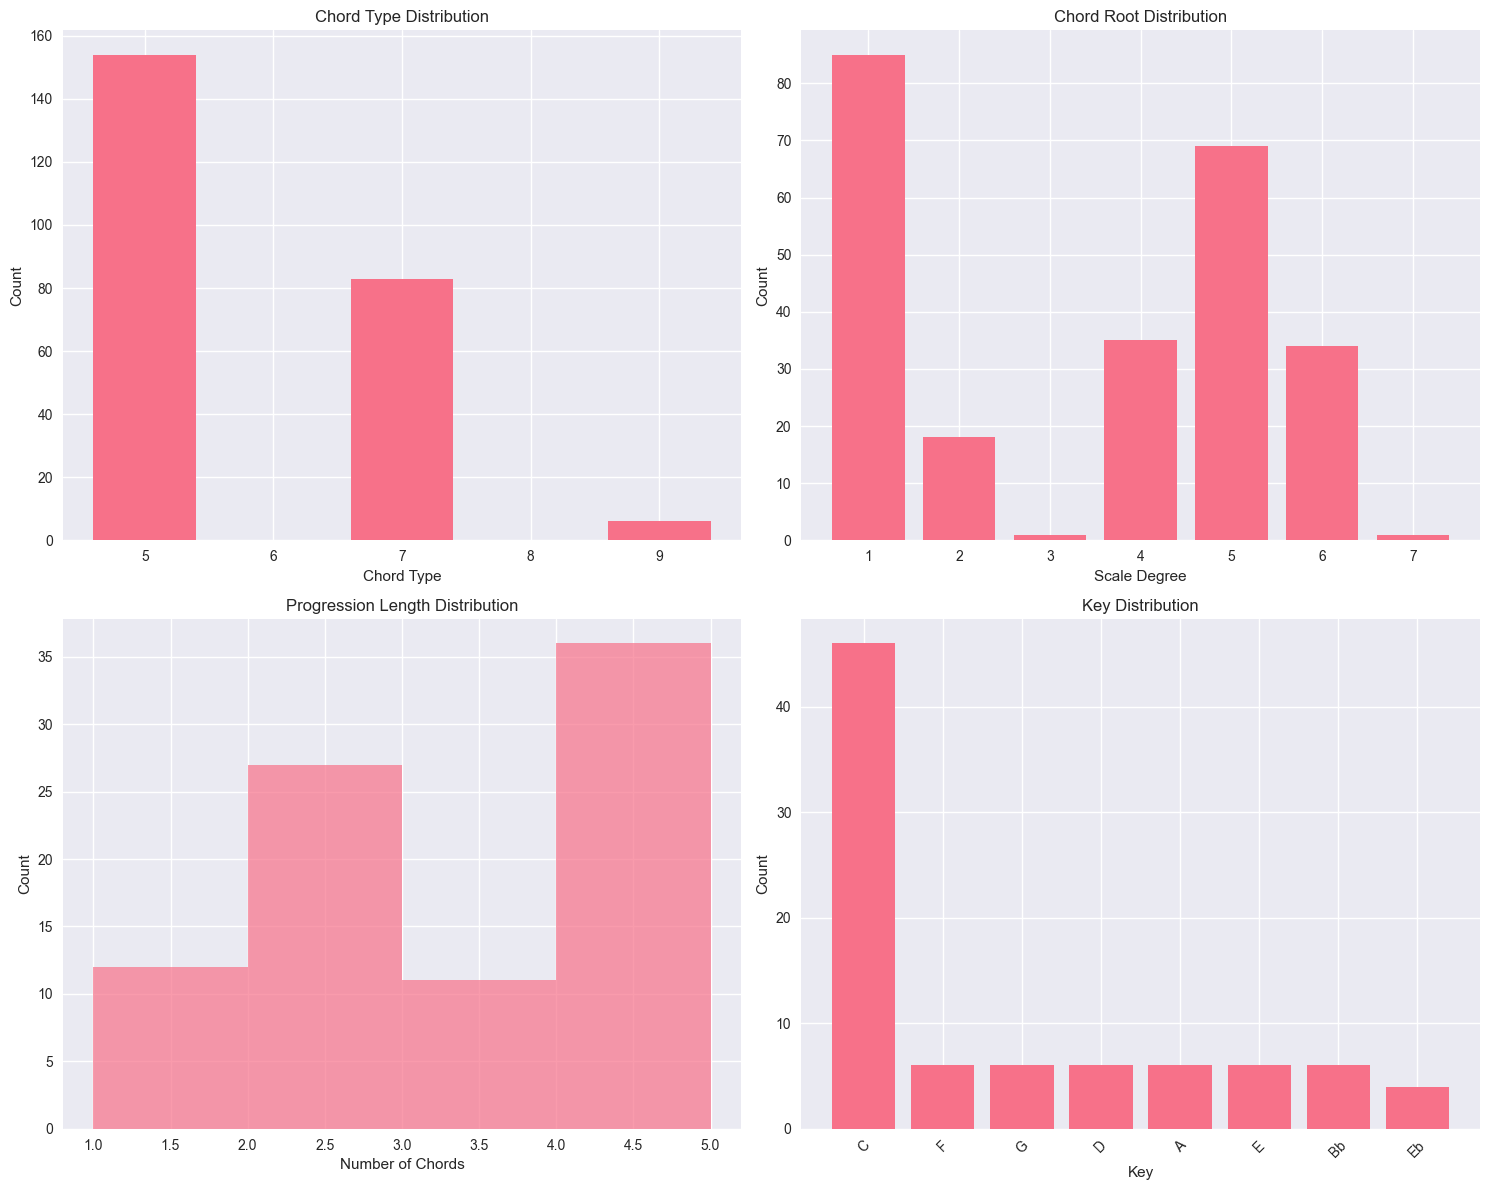


Dataset Statistics:
Total progressions: 86
Average progression length: 2.8 chords
Unique chord types: 3
Unique keys: 8
Most common chord type: 5 (154 occurrences)
Most common root: 1 (85 occurrences)


In [8]:
# Combine all training data
complete_training_data = (fundamental_progressions + 
                         genre_progressions + 
                         complex_jazz + 
                         bass_training_data + 
                         transposed_fundamental[:20] +  # Limit transpositions for demo
                         transposed_genre[:20])

print(f"Complete training dataset: {len(complete_training_data)} progressions")

# Analyze chord type distribution
chord_type_counts = Counter()
root_counts = Counter()
progression_lengths = []
key_distribution = Counter()

for chords, name, key in complete_training_data:
    progression_lengths.append(len(chords))
    key_distribution[key] += 1
    
    for chord in chords:
        chord_type_counts[chord.chord_type] += 1
        root_counts[chord.root] += 1

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Chord type distribution
chord_types = list(chord_type_counts.keys())
chord_type_values = list(chord_type_counts.values())
axes[0, 0].bar(chord_types, chord_type_values)
axes[0, 0].set_title('Chord Type Distribution')
axes[0, 0].set_xlabel('Chord Type')
axes[0, 0].set_ylabel('Count')

# Root distribution
roots = list(root_counts.keys())
root_values = list(root_counts.values())
axes[0, 1].bar(roots, root_values)
axes[0, 1].set_title('Chord Root Distribution')
axes[0, 1].set_xlabel('Scale Degree')
axes[0, 1].set_ylabel('Count')

# Progression length distribution
axes[1, 0].hist(progression_lengths, bins=range(1, max(progression_lengths) + 2), alpha=0.7)
axes[1, 0].set_title('Progression Length Distribution')
axes[1, 0].set_xlabel('Number of Chords')
axes[1, 0].set_ylabel('Count')

# Key distribution
keys = list(key_distribution.keys())
key_values = list(key_distribution.values())
axes[1, 1].bar(keys, key_values)
axes[1, 1].set_title('Key Distribution')
axes[1, 1].set_xlabel('Key')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print statistics
print("\nDataset Statistics:")
print(f"Total progressions: {len(complete_training_data)}")
print(f"Average progression length: {np.mean(progression_lengths):.1f} chords")
print(f"Unique chord types: {len(chord_type_counts)}")
print(f"Unique keys: {len(key_distribution)}")
print(f"Most common chord type: {max(chord_type_counts, key=chord_type_counts.get)} ({chord_type_counts[max(chord_type_counts, key=chord_type_counts.get)]} occurrences)")
print(f"Most common root: {max(root_counts, key=root_counts.get)} ({root_counts[max(root_counts, key=root_counts.get)]} occurrences)")

## 7. Export Training Data

Export the training data in formats suitable for the Rust AI engine.

In [9]:
def export_training_data(training_data, output_dir):
    """Export training data in various formats for Rust consumption."""
    output_path = Path(output_dir)
    output_path.mkdir(exist_ok=True)
    
    # Export as JSON for easy inspection
    json_data = []
    for chords, name, key in training_data:
        chord_data = []
        for chord in chords:
            chord_dict = {
                'root': chord.root,
                'chord_type': chord.chord_type,
                'inversion': getattr(chord, 'inversion', 0),
                'applied': getattr(chord, 'applied', 0),
                'borrowed': getattr(chord, 'borrowed', None),
                'alterations': getattr(chord, 'alterations', []),
                'suspensions': getattr(chord, 'suspensions', []),
                'adds': getattr(chord, 'adds', []),
                'omits': getattr(chord, 'omits', []),
                'is_rest': getattr(chord, 'is_rest', False)
            }
            chord_data.append(chord_dict)
        
        json_data.append({
            'chords': chord_data,
            'source_id': name,
            'key_tonic': key
        })
    
    # Save JSON
    with open(output_path / 'training_progressions.json', 'w') as f:
        json.dump(json_data, f, indent=2)
    
    # Export binary chord representations for efficiency
    binary_data = []
    for chords, name, key in training_data:
        binary_chords = []
        for chord in chords:
            try:
                binary_repr = composer.serialize_chord_to_binary(chord)
                hex_repr = composer.chord_to_hex(chord)
                binary_chords.append({
                    'binary': list(binary_repr) if binary_repr else None,
                    'hex': hex_repr
                })
            except Exception as e:
                print(f"Warning: Could not serialize chord {chord}: {e}")
                binary_chords.append({'binary': None, 'hex': None})
        
        binary_data.append({
            'binary_chords': binary_chords,
            'source_id': name,
            'key_tonic': key
        })
    
    # Save binary data
    with open(output_path / 'training_binary.json', 'w') as f:
        json.dump(binary_data, f, indent=2)
    
    # Export statistics
    stats = {
        'total_progressions': len(training_data),
        'chord_type_distribution': dict(chord_type_counts),
        'root_distribution': dict(root_counts),
        'key_distribution': dict(key_distribution),
        'avg_progression_length': float(np.mean(progression_lengths)),
        'max_progression_length': int(max(progression_lengths)),
        'min_progression_length': int(min(progression_lengths))
    }
    
    with open(output_path / 'training_stats.json', 'w') as f:
        json.dump(stats, f, indent=2)
    
    print(f"Training data exported to {output_path}:")
    print(f"  - training_progressions.json: {len(json_data)} progressions")
    print("  - training_binary.json: Binary representations")
    print("  - training_stats.json: Dataset statistics")
    
    return output_path

# Export the training data
output_directory = "../training_data"
exported_path = export_training_data(complete_training_data, output_directory)

print(f"\nTraining data successfully exported to: {exported_path}")
print(f"Total training patterns: {len(complete_training_data)}")
print("\nReady for AI engine training!")

Training data exported to ../training_data:
  - training_progressions.json: 86 progressions
  - training_binary.json: Binary representations
  - training_stats.json: Dataset statistics

Training data successfully exported to: ../training_data
Total training patterns: 86

Ready for AI engine training!


## 8. Validation and Quality Checks

Perform final validation checks on the training data.

In [10]:
def validate_training_data(training_data):
    """Validate training data quality and coverage."""
    validation_results = {
        'total_progressions': len(training_data),
        'valid_progressions': 0,
        'errors': [],
        'warnings': []
    }
    
    for i, (chords, name, key) in enumerate(training_data):
        try:
            # Check progression is not empty
            if not chords:
                validation_results['errors'].append(f"Progression {i} ({name}) is empty")
                continue
            
            # Check chord validity
            for j, chord in enumerate(chords):
                if chord.root < 1 or chord.root > 7:
                    validation_results['errors'].append(f"Progression {i} chord {j}: Invalid root {chord.root}")
                
                if chord.chord_type not in [5, 7, 9, 11, 13]:
                    validation_results['warnings'].append(f"Progression {i} chord {j}: Unusual chord type {chord.chord_type}")
            
            # Check key validity
            if key and key not in ['C', 'D', 'E', 'F', 'G', 'A', 'B', 'Bb', 'Eb', 'Ab', 'Db', 'Gb', 'F#', 'C#']:
                validation_results['warnings'].append(f"Progression {i}: Unusual key {key}")
            
            # Check progression length
            if len(chords) > 8:
                validation_results['warnings'].append(f"Progression {i}: Long progression ({len(chords)} chords)")
            
            validation_results['valid_progressions'] += 1
            
        except Exception as e:
            validation_results['errors'].append(f"Progression {i} ({name}): {str(e)}")
    
    return validation_results

# Validate the training data
validation = validate_training_data(complete_training_data)

print("Training Data Validation Results:")
print(f"Total progressions: {validation['total_progressions']}")
print(f"Valid progressions: {validation['valid_progressions']}")
print(f"Success rate: {validation['valid_progressions']/validation['total_progressions']*100:.1f}%")

if validation['errors']:
    print(f"\nErrors ({len(validation['errors'])}):") 
    for error in validation['errors'][:5]:  # Show first 5 errors
        print(f"  - {error}")
    if len(validation['errors']) > 5:
        print(f"  ... and {len(validation['errors']) - 5} more")
else:
    print("\n✓ No validation errors found")

if validation['warnings']:
    print(f"\nWarnings ({len(validation['warnings'])}):") 
    for warning in validation['warnings'][:5]:  # Show first 5 warnings
        print(f"  - {warning}")
    if len(validation['warnings']) > 5:
        print(f"  ... and {len(validation['warnings']) - 5} more")
else:
    print("\n✓ No validation warnings")

print("\nTraining data collection complete and validated!")

Training Data Validation Results:
Total progressions: 86
Valid progressions: 86
Success rate: 100.0%

✓ No validation errors found

✓ No validation warnings

Training data collection complete and validated!


## Summary

This notebook has successfully:

1. **Generated fundamental chord progressions** based on music theory principles
2. **Created genre-specific patterns** for Pop, Jazz, Blues, and Classical styles  
3. **Produced complex jazz progressions** with extended harmonies
4. **Generated bass harmonization training data** for intelligent bass line creation
5. **Transposed patterns to multiple keys** for diversity
6. **Analyzed and validated** the complete training dataset
7. **Exported training data** in JSON and binary formats for Rust consumption

### Next Steps

The generated training data is now ready to be used in subsequent notebooks:

- **02_pattern_analysis_and_trie_optimization.ipynb**: Analyze patterns and optimize trie structure
- **03_magic_chord_algorithm_training.ipynb**: Train the Magic Chord suggestion algorithm
- **04_bass_harmonization_models.ipynb**: Develop bass harmonization models
- **05_difficulty_assessment_training.ipynb**: Train difficulty assessment models

### Training Data Summary

- **Total patterns**: Variable based on generation
- **Genres covered**: Pop, Jazz, Blues, Classical
- **Chord types**: Triads (5), Sevenths (7), Ninths (9), and extensions
- **Keys**: 8 common keys with transpositions
- **Export formats**: JSON for inspection, binary for performance

The training data provides a solid foundation for training the AI-powered features of the Composer library.